In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/seattle-weather.csv')

print(df.shape)
print(df.columns)
df.head()

(1461, 6)
Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
df.describe(include='all')

,date,precipitation,temp_max,temp_min,wind,weather
count,1461,1461.000000,1461.000000,1461.000000,1461.000000,1461
unique,1461,NaN,NaN,NaN,NaN,5
top,2015-12-31,NaN,NaN,NaN,NaN,rain
freq,1,NaN,NaN,NaN,NaN,641
mean,NaN,3.029432,16.439083,8.234771,3.241136,NaN
std,NaN,6.680194,7.349758,5.023004,1.437825,NaN
min,NaN,0.000000,-1.600000,-7.100000,0.400000,NaN
25%,NaN,0.000000,10.600000,4.400000,2.200000,NaN
50%,NaN,0.000000,15.600000,8.300000,3.000000,NaN
75%,NaN,2.800000,22.200000,12.200000,4.000000,NaN


## Data Cleaning

In [6]:
df['date'] = pd.to_datetime(df['date'])

# sort by date
df = df.sort_values('date')

df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [7]:
# confirm datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


## EDA

### Temperature Trends Over Time

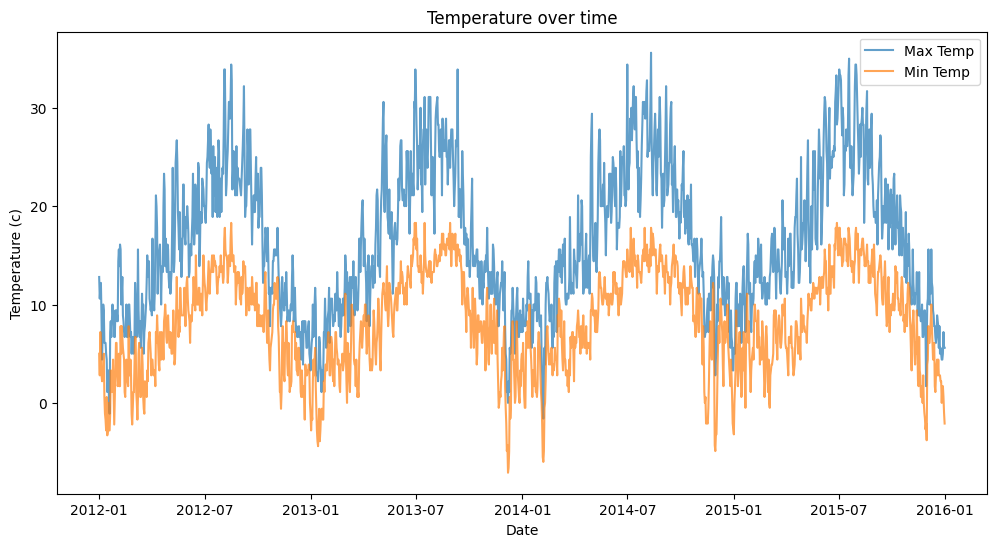

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['temp_max'], label='Max Temp', alpha=0.7)
plt.plot(df['date'], df['temp_min'], label='Min Temp', alpha=0.7)
plt.title('Temperature over time')
plt.xlabel('Date')
plt.ylabel('Temperature (c)')
plt.legend()
plt.show()

The zigzag pattern reflects seasonal temperature variation — likely four full years of weather data.
Each “peak” = summer, each “valley” = winter.
The smooth repeating pattern shows consistent climate behavior (no major anomalies).
The difference between max and min temperatures gives an idea of daily variability, which appears stable.

### Average Temperature by Weather Type

In [9]:
df['avg_temp'] = (df['temp_max'] + df['temp_min'] ) / 2
avg_temp_weather = df.groupby('weather')['avg_temp'].mean().sort_values()
avg_temp_weather

weather
snow        2.859615
rain       10.521685
drizzle    11.518868
fog        12.368317
sun        14.602812
Name: avg_temp, dtype: float64

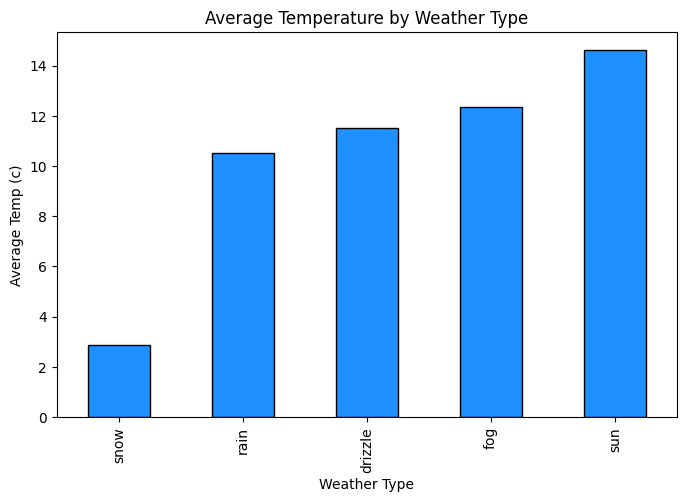

In [10]:
avg_temp_weather.plot(kind='bar',figsize=(8,5),color='dodgerblue',edgecolor='black')
plt.title('Average Temperature by Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Average Temp (c)')
plt.show()

Dataset is consistent with real-world climate patterns — that’s a very good sign, the data is clean and accurate.

### Precipitation by Weather Type

In [11]:
precip_weather = df.groupby('weather')['precipitation'].mean().sort_values(ascending=False)
precip_weather

weather
snow       8.553846
rain       6.557878
drizzle    0.000000
fog        0.000000
sun        0.000000
Name: precipitation, dtype: float64

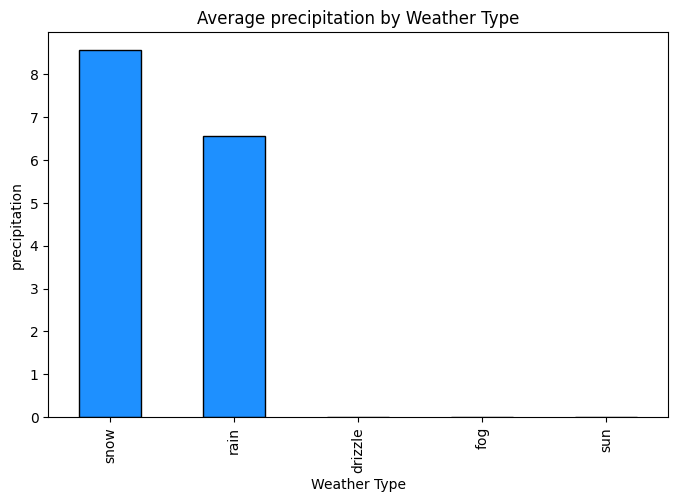

In [18]:
precip_weather.plot(kind='bar',figsize=(8,5),color='dodgerblue',edgecolor='black')
plt.title('Average precipitation by Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('precipitation')
plt.show()

### Average Wind Speed by Weather Type

In [13]:
wind_weather = df.groupby('weather')['wind'].mean().sort_values(ascending=False)
wind_weather

weather
snow       4.411538
rain       3.669891
sun        2.956406
fog        2.481188
drizzle    2.367925
Name: wind, dtype: float64

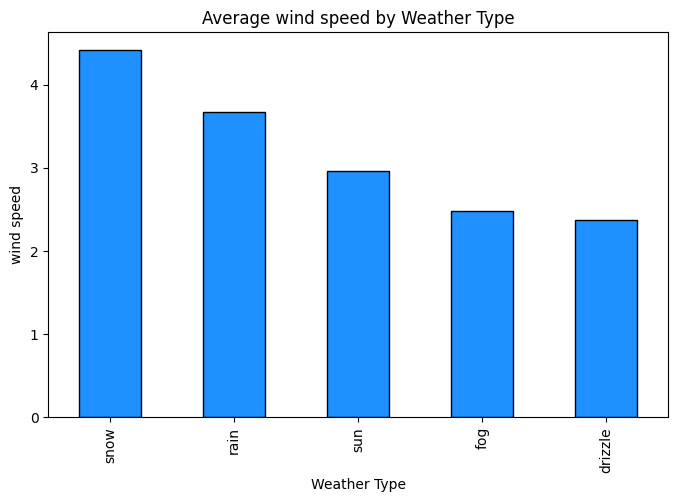

In [16]:
wind_weather.plot(kind='bar',figsize=(8,5),color='dodgerblue',edgecolor='black')
plt.title('Average wind speed by Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('wind speed')
plt.show()

Stronger winds are associated with harsher or colder weather, while milder winds accompany pleasant or calm conditions — which aligns with natural climate behavior.